### Importación de datos



In [83]:
import pandas as pd

url = "../resources/base-de-datos-challenge1-latam/tienda_1.csv"
url2 = "../resources/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "../resources/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "../resources/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [84]:
store_revenue = sum(tienda['Precio'])

store2_revenue = sum(tienda2['Precio'])

store3_revenue = sum(tienda3['Precio'])

store4_revenue = sum(tienda4['Precio'])

print("Total selling per store")
print(f"store 1: {store_revenue}, store 2: {store2_revenue}, store 3: {store3_revenue}, store 4: {store4_revenue}")


Total selling per store
store 1: 1150880400.0, store 2: 1116343500.0, store 3: 1098019600.0, store 4: 1038375700.0


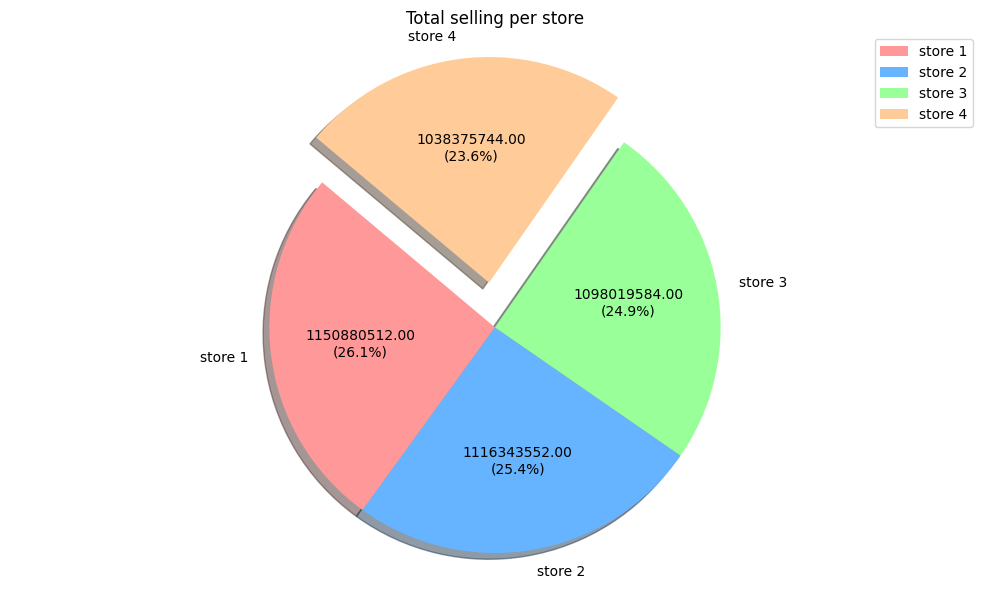

In [ ]:
import matplotlib.pyplot as plt

labels = ['store 1', 'store 2', 'store 3', 'store 4']
values = [store_revenue, store2_revenue, store3_revenue, store4_revenue]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10,6))
plt.title('Total selling per store')

explode = [0.2 if value == min(values) else 0 for value in values] # Resalta la tienda con menor venta
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct=lambda p: '{:.2f}\n({:.1f}%)'.format(p * sum(values) / 100, p), # Muestra valor y porcentaje
        shadow=True, startangle=140)
plt.legend()
# plt.bar(labels, values, color=colors)
# plt.xlabel('Stores')
# plt.ylabel('Total selling')
# plt.xticks()
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [9]:
# En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.
# Version sin pandas
stores = {
    "store_1": tienda,
    "store_2": tienda2,
    "store_3": tienda3,
    "store_4": tienda4
}

def get_total_sales_by_category(store):
    filtered_categories = list(set(store['Categoría del Producto']))
    store_categories = {filtered_categories[i]: sum([1 for category in store['Categoría del Producto'] if category == filtered_categories[i]]) for i in range(len(filtered_categories))}
    
    return store_categories

def get_top_categories(categories):
    sorted_categories = sorted(categories.items(), key=lambda x: x[1], reverse=True)
    return sorted_categories[:2]

total_sales_by_category = {}
for store_name, store in stores.items():
    all_sales_by_category = get_total_sales_by_category(store)
    total_sales_by_category[store_name] = get_top_categories(all_sales_by_category)


total_sales_by_category


{'store_1': [('Muebles', 465), ('Electrónicos', 448)],
 'store_2': [('Muebles', 442), ('Electrónicos', 422)],
 'store_3': [('Muebles', 499), ('Electrónicos', 451)],
 'store_4': [('Muebles', 480), ('Electrónicos', 451)]}

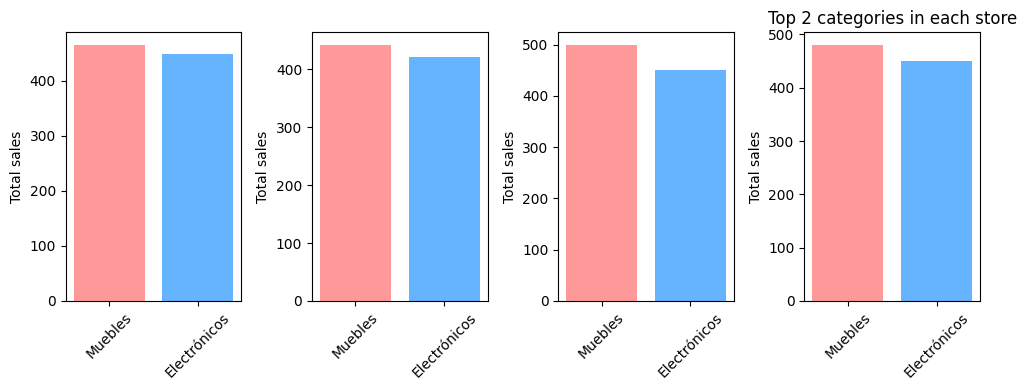

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(10, 4))  # Una fila
colors = ['#FF9999', '#66B3FF']
plt.title('Top 2 categories in each store')

for i, (store_name, categories) in enumerate(total_sales_by_category.items()):
    labels = [category[0] for category in categories]
    values = [category[1] for category in categories]
    
    ax = axes[i]
    ax.bar(labels, values, color=colors)
    ax.set_ylabel('Total sales')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [10]:
# stores
stores_ratings = []
print("\nCalificación promedio total de cada tienda:")
for store_name, store in stores.items():
    average = store['Calificación'].mean()
    stores_ratings.append((store_name, round(average, 2)))


Calificación promedio total de cada tienda:
[('store_1', np.float64(3.98)), ('store_2', np.float64(4.04)), ('store_3', np.float64(4.05)), ('store_4', np.float64(4.0))]


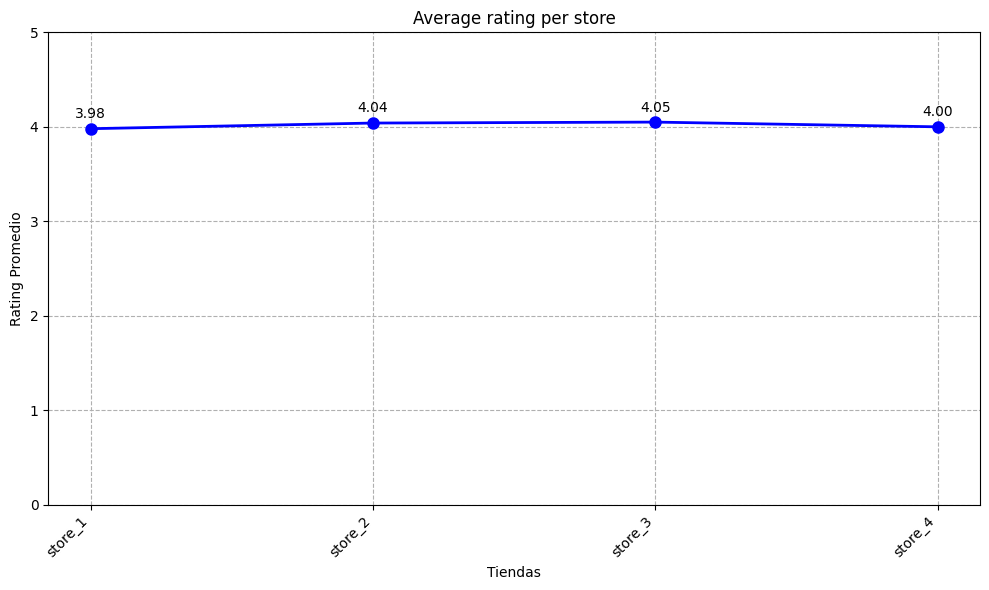

In [18]:
import matplotlib.pyplot as plt

stores_tags = [store[0] for store in stores_ratings]
stores_values = [store[1] for store in stores_ratings]

# Primero definimos la figura y el tamaño y el título
plt.figure(figsize=(10,6))
plt.title('Average rating per store')

plt.plot(stores_tags, stores_values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

for i, rating in enumerate(stores_values):
    plt.text(stores_tags[i], rating + 0.08, f'{rating:.2f}', ha='center', va='bottom')

plt.xlabel('Tiendas')
plt.ylabel('Rating Promedio')
plt.ylim(0, 5)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()
plt.show()

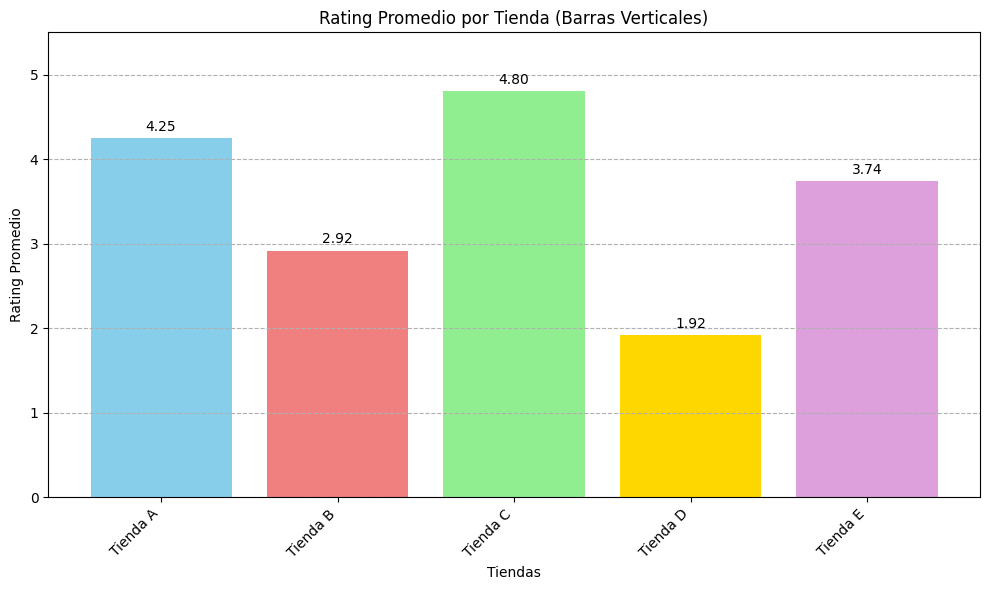

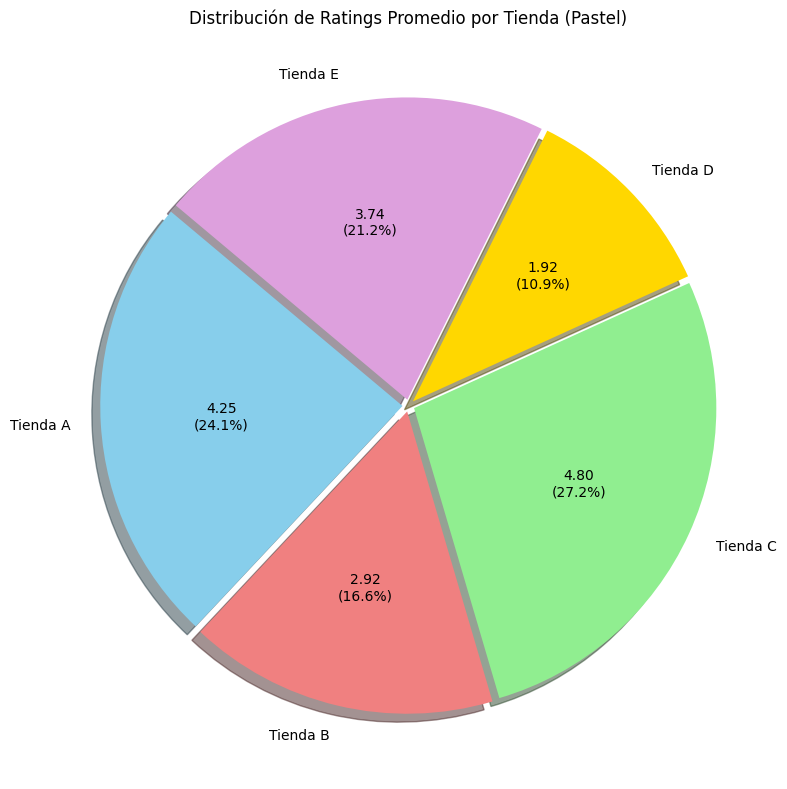

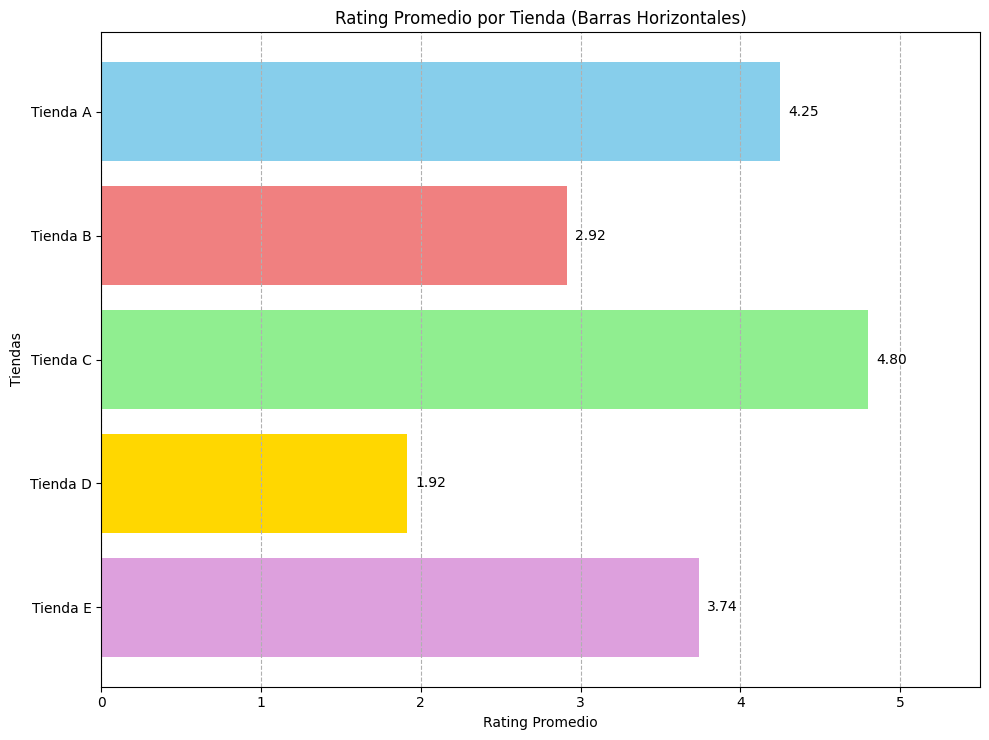

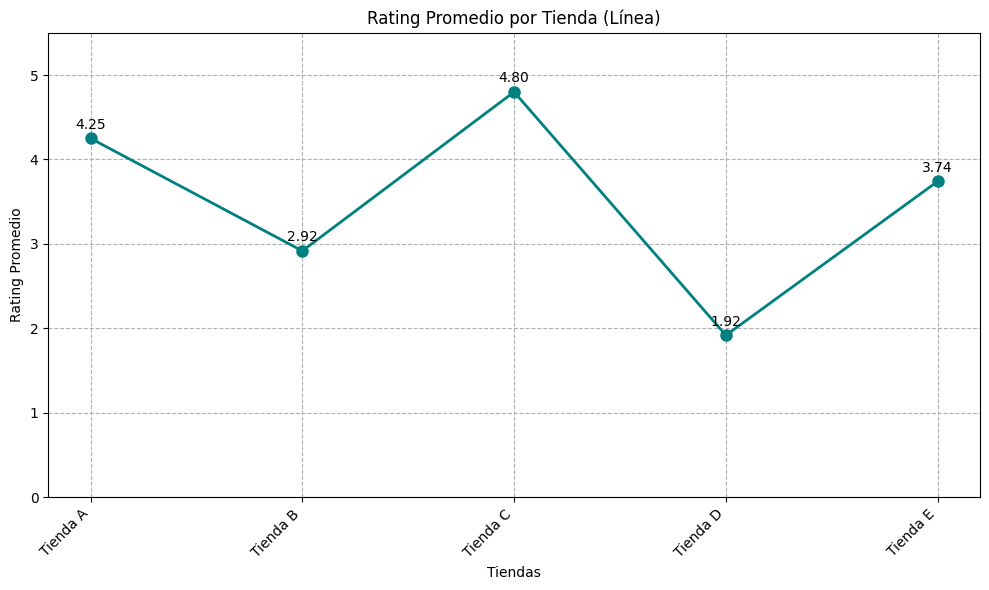

ValueError: RGBA sequence should have length 3 or 4

<Figure size 1000x600 with 1 Axes>

Se han generado varios tipos de gráficos. ¡Revisa las ventanas emergentes!


In [4]:
import matplotlib.pyplot as plt
import pandas as pd # Necesario si 'stores' contiene DataFrames de Pandas

# --- 1. Preparación de Datos (Usa tus datos reales aquí) ---
# Ejemplo de datos (reemplaza esto con tus datos reales):
stores_data_example = {
    'Tienda A': pd.DataFrame({'Calificación': [4, 5, 4, 3, 5, 4.5]}),
    'Tienda B': pd.DataFrame({'Calificación': [3, 2, 3, 4, 3, 2.5]}),
    'Tienda C': pd.DataFrame({'Calificación': [5, 5, 4, 5, 5, 4.8]}),
    'Tienda D': pd.DataFrame({'Calificación': [2, 1, 2, 3, 2, 1.5]}),
    'Tienda E': pd.DataFrame({'Calificación': [4, 4, 3, 3.5, 4.2]})
}
# Asegúrate de que 'stores' sea tu variable con los datos
stores = stores_data_example # ¡¡¡IMPORTANTE: USA TUS DATOS AQUÍ!!!

store_names = list(stores.keys())
average_ratings = [store['Calificación'].mean() for store in stores.values()]

# Definir colores (puedes extender esta lista si tienes más tiendas)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightsalmon', 'cyan', 'orchid', 'khaki']
# Asegurarse de que hay suficientes colores o que se reciclen para cada tienda
num_stores = len(store_names)
plot_colors = [colors[i % len(colors)] for i in range(num_stores)]

# --- 2. Gráfico de Barras Vertical (Tu ejemplo, ligeramente mejorado) ---
plt.figure(figsize=(10, 6))
plt.title('Rating Promedio por Tienda (Barras Verticales)')
bars = plt.bar(store_names, average_ratings, color=plot_colors)
plt.xlabel('Tiendas')
plt.ylabel('Rating Promedio')
plt.ylim(0, 5.5) # Ajustar el límite superior un poco para el texto
plt.xticks(rotation=45, ha="right") # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--')

# Añadir el valor exacto encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout() # Ajusta para que todo quepa bien
plt.show()

# --- 3. Gráfico de Pastel (Pie Chart) ---
# Nota: Los gráficos de pastel son mejores para mostrar proporciones de un todo.
# Usarlo para ratings promedio puede no ser la visualización más intuitiva
# para comparar valores absolutos, pero se puede hacer.
# Las "rebanadas" serán proporcionales al rating promedio.

plt.figure(figsize=(8, 8))
plt.title('Distribución de Ratings Promedio por Tienda (Pastel)')
# 'explode' puede usarse para destacar alguna rebanada
# explode = [0.1 if rating == max(average_ratings) else 0 for rating in average_ratings] # Destaca la mejor
explode = [0.02] * num_stores # Pequeña separación para todas

plt.pie(average_ratings, explode=explode, labels=store_names, colors=plot_colors,
        autopct=lambda p: '{:.2f}\n({:.1f}%)'.format(p * sum(average_ratings) / 100, p), # Muestra valor y porcentaje
        shadow=True, startangle=140)
plt.axis('equal') # Asegura que el pastel sea circular
plt.tight_layout()
plt.show()

# --- 4. Gráfico de Barras Horizontales ---
plt.figure(figsize=(10, 6 + num_stores * 0.3)) # Ajustar altura según número de tiendas
plt.title('Rating Promedio por Tienda (Barras Horizontales)')
bars_h = plt.barh(store_names, average_ratings, color=plot_colors)
plt.xlabel('Rating Promedio')
plt.ylabel('Tiendas')
plt.xlim(0, 5.5) # Ajustar límite para el texto

# Añadir el valor exacto al lado de cada barra
for bar in bars_h:
    xval = bar.get_width()
    plt.text(xval + 0.05, bar.get_y() + bar.get_height()/2.0, f'{xval:.2f}', ha='left', va='center')

plt.gca().invert_yaxis() # Opcional: Muestra la tienda con mayor rating arriba
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

# --- 5. Gráfico de Línea ---
# Útil si hay algún orden inherente en las tiendas o para ver "tendencias"
# (aunque con ratings promedio puede ser menos intuitivo que las barras).
plt.figure(figsize=(10, 6))
plt.title('Rating Promedio por Tienda (Línea)')
plt.plot(store_names, average_ratings, marker='o', linestyle='-', color='teal', linewidth=2, markersize=8)

# Añadir el valor exacto en cada punto
for i, rating in enumerate(average_ratings):
    plt.text(store_names[i], rating + 0.08, f'{rating:.2f}', ha='center', va='bottom')

plt.xlabel('Tiendas')
plt.ylabel('Rating Promedio')
plt.ylim(0, 5.5)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# --- 6. Gráfico de Puntos (Dot Plot / Lollipop Chart) ---
# Similar a un gráfico de barras pero puede ser menos denso visualmente.
plt.figure(figsize=(10, 6))
plt.title('Rating Promedio por Tienda (Lollipop)')
(markers, stemlines, baseline) = plt.stem(store_names, average_ratings, linefmt='grey', markerfmt='o', basefmt=" ")
plt.setp(markers, 'markerfacecolor', plot_colors, 'markeredgecolor', 'grey', 'markersize', 10)
plt.setp(stemlines, 'color', plot_colors, 'linewidth', 2)


plt.xlabel('Tiendas')
plt.ylabel('Rating Promedio')
plt.ylim(0, 5.5)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--')

# Añadir el valor exacto encima de cada punto (opcional, puede verse cargado)
for i, rating in enumerate(average_ratings):
    plt.text(store_names[i], rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Se han generado varios tipos de gráficos. ¡Revisa las ventanas emergentes!")

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [31]:
    
print("\nProductos mas vendidos por tienda:")

def get_count_total_sales_by_product(lista:list[str]):
    filtered_products = list(set([product for product in lista]))
    count_total_products = {filtered_products[i]: sum([1 for product in lista if product == filtered_products[i]]) for i in range(len(filtered_products))}    
    return count_total_products

def get_top_products(products):
    sorted_products = sorted(products.items(), key=lambda x: x[1], reverse=True)
    return sorted_products[:1]

def get_lowest_selling_products(products):
    # ordenamos por la segunda posición x=(label, value) entonces x[1] = value 
    sorted_products = sorted(products.items(), key=lambda x: x[1])
    return sorted_products[:1]

stores_names = []
most_selling_products_tags = []
most_selling_products = []
lowest_selling_products_tags = []
lowest_selling_products = []

for store_name, store in stores.items():
    all_sales_by_product = get_count_total_sales_by_product(store['Producto'])
    top_product = get_top_products(all_sales_by_product)
    lowest_selling_product = get_lowest_selling_products(all_sales_by_product)
    
    stores_names.append(store_name)
    most_selling_products_tags.append(top_product[0][0])
    most_selling_products.append(top_product[0][1])
    lowest_selling_products_tags.append(lowest_selling_product[0][0])
    lowest_selling_products.append(lowest_selling_product[0][1])
    
print(most_selling_products_tags, most_selling_products)
    


Productos mas vendidos por tienda:
['Microondas', 'Iniciando en programación', 'Kit de bancas', 'Cama box'] [60, 65, 57, 62]


[0 1 2 3]


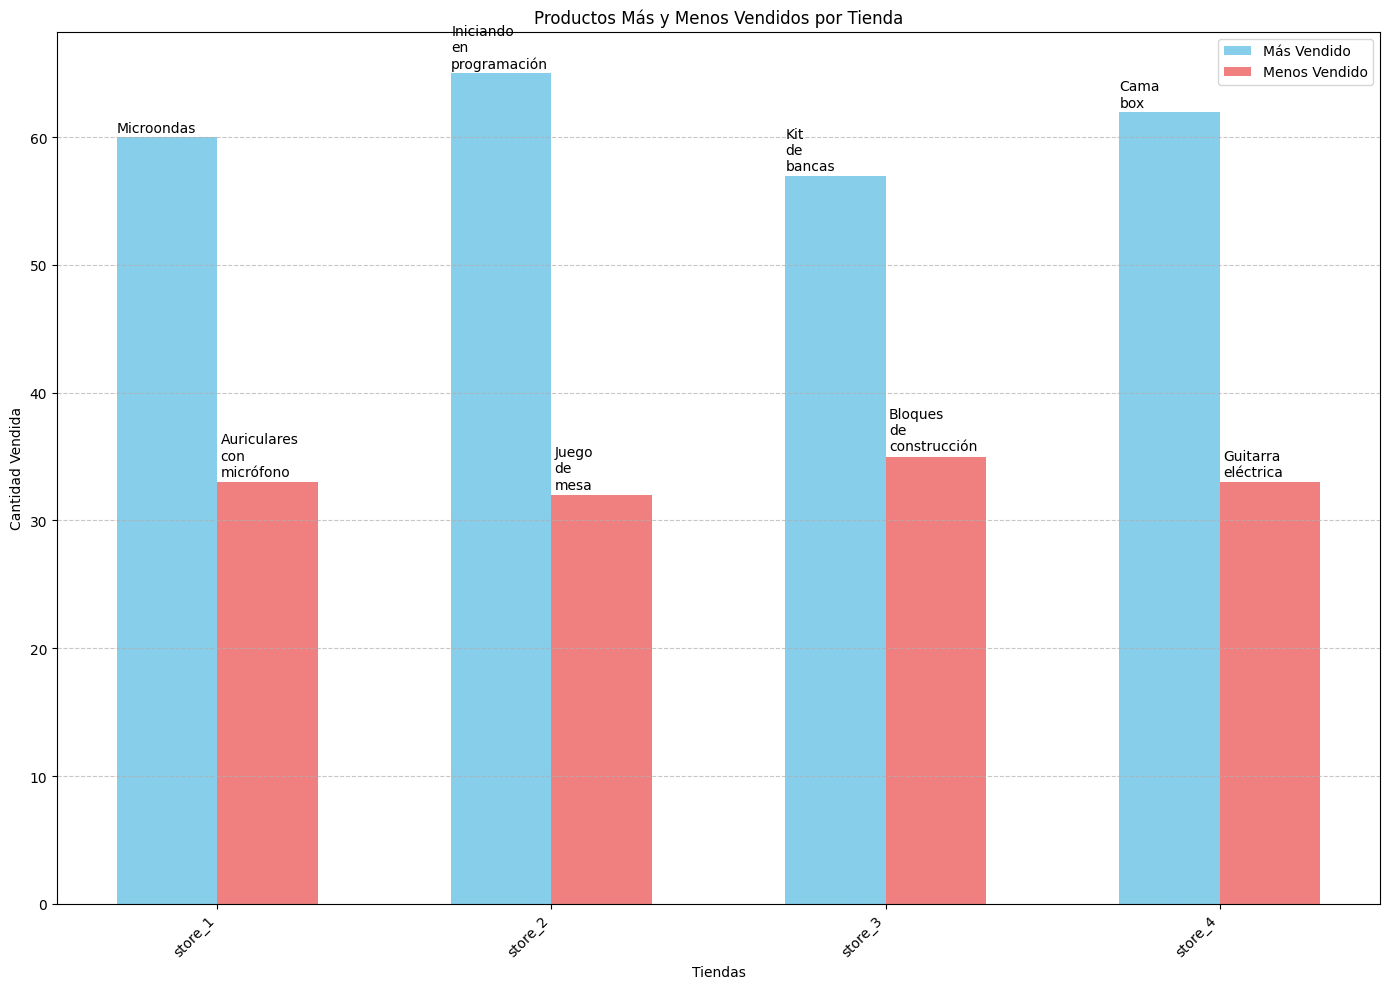

In [79]:
import matplotlib.pyplot as plt
# figura y el objeto para ejecutar las funciones de matplotlib
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(stores_names))  # las localizaciones de las etiquetas de las tiendas
print(x)
width = 0.30  # el ancho de las barras
#        coordenadas, valores, ancho, etiqueta, color
rects1 = ax.bar(x - width/2, most_selling_products,width ,label='Más Vendido', color='skyblue')
rects2 = ax.bar(x + width/2, lowest_selling_products,width ,label='Menos Vendido', color='lightcoral')

for i,j in zip(x, most_selling_products):
    display_name = '\n'.join(most_selling_products_tags[i].split(' '))
    ax.annotate(display_name, xy=(i-0.3, j + 0.4),)
    
for i,j in zip(x, lowest_selling_products):
    display_name = '\n'.join(lowest_selling_products_tags[i].split(' '))
    # display_name = (lowest_selling_products_tags[i][:10] + '...') if len(lowest_selling_products_tags[i]) > 12 else lowest_selling_products_tags[i]
    ax.annotate(display_name, xy=(i+.01, j + 0.5),)

ax.set_ylabel('Cantidad Vendida')
ax.set_xlabel('Tiendas')
ax.set_title('Productos Más y Menos Vendidos por Tienda')
# Seteamos la coordenadas donde se van a colocar las etiquetas de las tiendas
ax.set_xticks(x)
ax.set_xticklabels(stores_names, rotation=45, ha="right") # Rotar etiquetas de tiendas si son largas
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout() # Ajusta el diseño para que todo quepa bien
plt.show()

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [31]:
def average_shipping_cost_per_store(lista:list[float]):
    average = sum(lista) / len(lista)
    return average
    

for store_name, store in stores.items():
    # average_shipping_cost = average_shipping_cost_per_store(store['Costo de envío'])
    average_shipping_cost = store['Costo de envío'].mean()
    print(f"El costo promedio de envío en {store_name} es: {round(average_shipping_cost, 2)}")
    

El costo promedio de envío en store_1 es: 26018.61
El costo promedio de envío en store_2 es: 25216.24
El costo promedio de envío en store_3 es: 24805.68
El costo promedio de envío en store_4 es: 23459.46
